In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np
import pandas as pd
from scipy import stats

import watermark

plt.style.use('./CDS_paper.mplstyle')
tab10 = plt.get_cmap("tab10").colors

%matplotlib inline
%load_ext watermark
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.19.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.27)
OS          : Darwin
Release     : 20.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

Git hash: 

matplotlib: 3.3.3
scipy     : 1.5.4
pandas    : 1.1.4
numpy     : 1.19.4
watermark : 2.1.0



Load data for all individuals in the $D$ cohort

In [2]:
CDS_D_prev_noURLs = pd.read_csv("results/D_no_urls_nor_http_within_user_prevalence.tsv", sep="\t", index_col=0)
CDS_D_prev = pd.read_csv("results/D_within_user_prevalence.tsv", sep="\t", index_col=0)

Load data for all individuals in the $R$ cohort

In [3]:
CDS_R_prev_noURLs = pd.read_csv("results/R_no_urls_nor_http_within_user_prevalence.tsv", sep="\t", index_col=0)
CDS_R_prev = pd.read_csv("results/R_within_user_prevalence.tsv", sep="\t", index_col=0)

Define plotting functions

In [4]:
def boxplot(ax, data, loc, color=(0, 0, 0)):    
    ax.fill_between([data.quantile(q=0.25), data.quantile(q=0.75)], loc - 0.15, loc + 0.15,
                    facecolor=(*color, 0.4), edgecolor=color, lw=3, zorder=3)
    ax.vlines(data.mean(), loc - 0.25, loc + 0.25, color=color, zorder=3)
    ax.plot([data.quantile(q=0.025), data.quantile(q=0.975)], [loc, loc],
            color=color, lw=0, marker="|", ms=12, mew=3, zorder=3)
    ax.plot([data.quantile(q=0.025), data.quantile(q=0.25)], [loc, loc], color=color, marker="", zorder=3)
    ax.plot([data.quantile(q=0.75), data.quantile(q=0.975)], [loc, loc], color=color, marker="", zorder=3)
    
    lower = data.values[data < data.quantile(q=0.025)]
    upper = data.values[data > data.quantile(q=0.975)]

    ax.scatter(lower, loc * np.ones(lower.shape), marker=".", color=color, zorder=3)
    ax.scatter(upper, loc * np.ones(upper.shape), marker=".", color=color, zorder=3)
    
    return ax


def check_significance(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""


def annotate_stats(ax, D, R, loc):
    W = stats.ttest_ind(D, R, equal_var=False)
    ax.annotate(r"{}".format(check_significance(W.pvalue)), (0.99, loc + 0.075),
                xycoords="data", ha="right", va="top", fontsize=16)
    return ax

# Figure

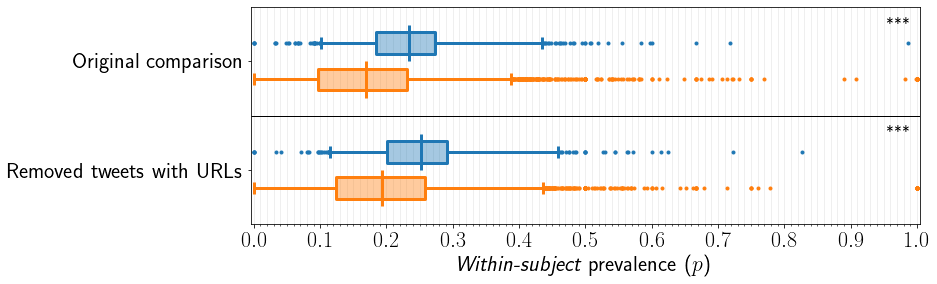

In [5]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

ax = annotate_stats(ax, CDS_D_prev["prevalence"], CDS_R_prev["prevalence"], 0)
ax = boxplot(ax, CDS_D_prev["prevalence"], 0.5, color=tab10[0])
ax = boxplot(ax, CDS_R_prev["prevalence"], 1, color=tab10[1])
ax = annotate_stats(ax, CDS_D_prev_noURLs["prevalence"], CDS_R_prev_noURLs["prevalence"], 1.5)
ax = boxplot(ax, CDS_D_prev_noURLs["prevalence"], 2, color=tab10[0])
ax = boxplot(ax, CDS_R_prev_noURLs["prevalence"], 2.5, color=tab10[1])
ax.hlines([1.5], -0.005, 1.005, color="k", lw=1, zorder=2)
ax.set_xlim(-0.005, 1.005)
ax.xaxis.set_major_locator(mticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.01))
ax.set_xlabel(r"\textit{Within-subject} prevalence ($p$)")
ax.set_ylim(bottom=0, top=3)
ax.set_yticks([0.75, 2.25])
ax.set_yticklabels([r"Original comparison", r"Removed tweets with URLs"])
ax.yaxis.set_minor_locator(mticker.NullLocator())
ax.invert_yaxis()
ax.grid(axis="y", which="major", b=False)

fig.savefig("figures/FigS2.pdf", dpi=600, orientation='portrait',
            facecolor='w', edgecolor='w', bbox_inches='tight')